## import netCDF4 as nc

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import polars as pl
import numpy as np
import netCDF4 as nc
import re

sys_site = 61
ωc = 0.18
ωmax = 0.40
λ = 0.10  # eV a.k.a reorganization energy
nsite = 184

plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["lines.linewidth"] = 3.0
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["figure.titlesize"] = 30
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
plt.rcParams["font.family"] = "DejaVu Sans"

# CAUTION!! The index of CT and TT in `singlet_fission_prop` and `singlet_fission_60D_prop` (adaptive) are flipped.

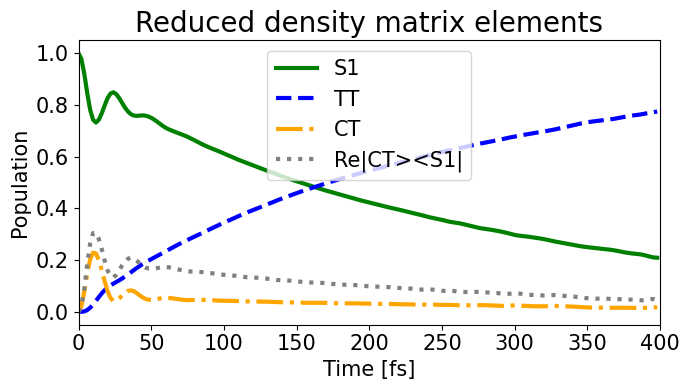

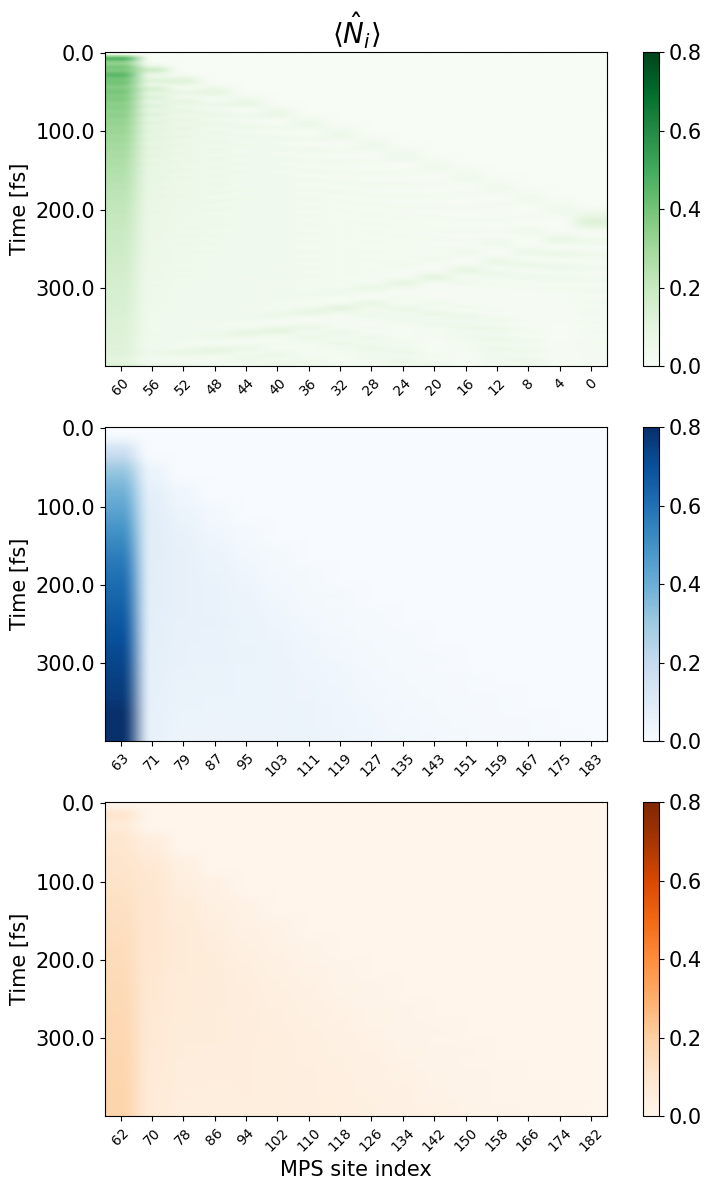

In [2]:
pathdir = "singlet_fission_prop"#_60D_prop"
with nc.Dataset(f"{pathdir}/reduced_density.nc","r") as file:
    density_data_real = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["real"]
    density_data_imag = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["imag"]
    time_data = file.variables["time"][:]

plt.figure(figsize=(7,4))
plt.title(f"Reduced density matrix elements")
plt.xlabel("Time [fs]")
plt.ylabel("Population")
plt.plot(time_data, density_data_real[:, 0, 0], label="S1", color='green', linestyle='-')
plt.plot(time_data, density_data_real[:, 1, 1], label="TT", color='blue', linestyle='--')
plt.plot(time_data, density_data_real[:, 2, 2], label="CT", color='orange',linestyle='-.')
plt.plot(time_data, density_data_real[:, 0, 2], label="Re|CT><S1|", color='gray', linestyle=':')
plt.xlim(0.0, 400)
plt.legend()
plt.tight_layout()
plt.savefig("reduced-density.pdf")
plt.show()

path = f"{pathdir}/expectations.dat"
with open(path, "r") as f:
    header = f.readline().strip()
    columns = re.split(r"\s+", header)
    columns = [columns[1]] + columns[3:]
    data = f.readlines()

df = pl.read_csv(
    path,
    separator="\t",
    new_columns=columns,
    has_header=False,
    skip_rows=1,
    schema_overrides={col: pl.Float64 for col in columns},
)

plt.figure(figsize=(8, 12))
columns_S1=columns[2:18]
plt.subplot(3, 1, 1)
plt.imshow(df[columns_S1], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Greens")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_S1)), [name[1:] for name in columns_S1], rotation=45,size=10)
plt.title(r"$\langle \hat{N}_i \rangle$")

plt.subplot(3, 1, 2)
columns_TT=columns[34:50]
plt.imshow(df[columns_TT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Blues")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_TT)), [name[1:] for name in columns_TT], rotation=45, size=10)

plt.subplot(3, 1, 3)
columns_CT=columns[18:34]
plt.imshow(df[columns_CT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Oranges")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_CT)), [name[1:] for name in columns_CT], rotation=45, size=10)

plt.tight_layout()
plt.savefig("bath-expectation.pdf")
plt.show()

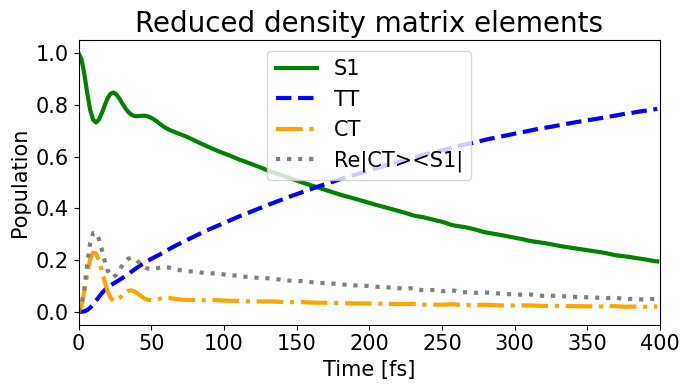

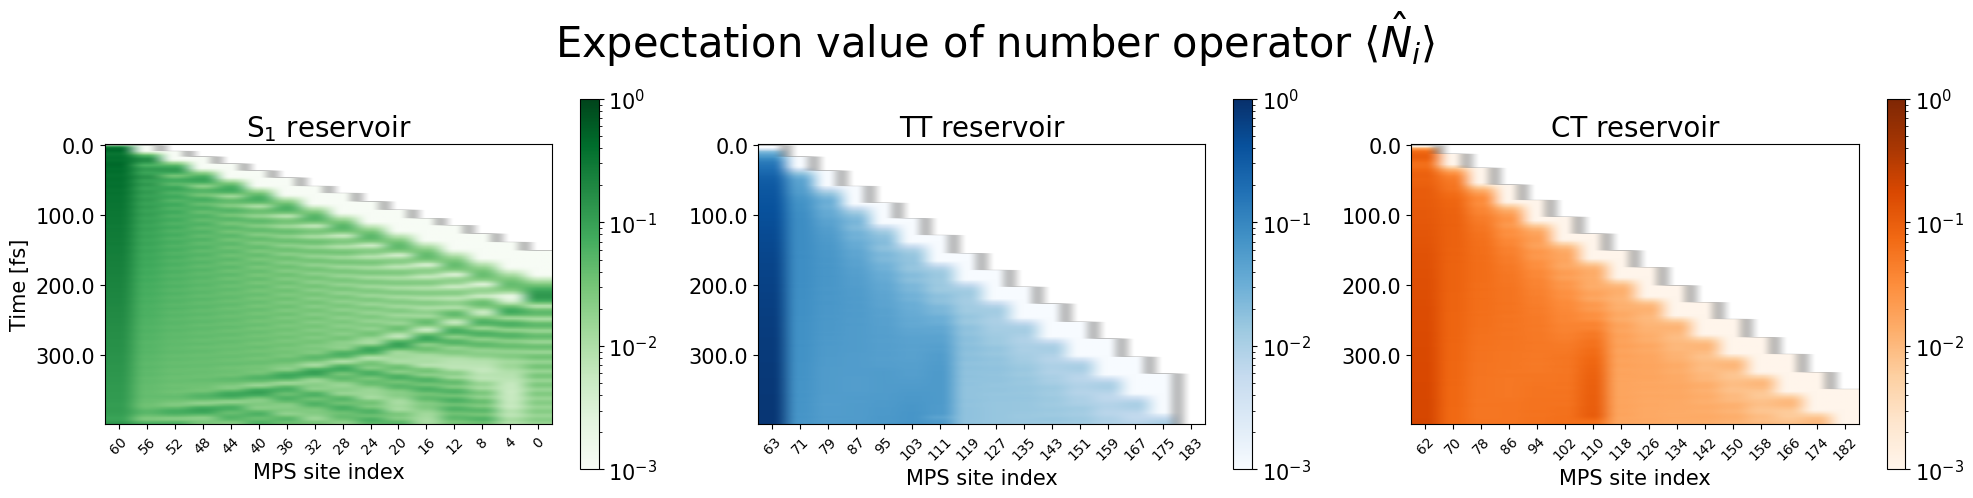

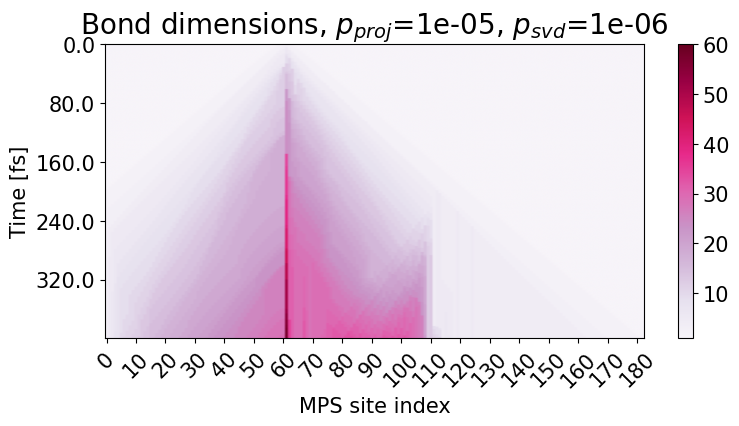

In [3]:
D=60
proj=5
svd=6
pathdir = f"singlet_fission_{D}D-0{proj}proj-0{svd}svd_prop"
with nc.Dataset(f"{pathdir}/reduced_density.nc","r") as file:
    density_data_real = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["real"]
    density_data_imag = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["imag"]
    time_data = file.variables["time"][:]

plt.figure(figsize=(7,4))
plt.title(f"Reduced density matrix elements")
plt.xlabel("Time [fs]")
plt.ylabel("Population")
plt.plot(time_data, density_data_real[:, 0, 0], label="S1", color='green', linestyle='-')
plt.plot(time_data, density_data_real[:, 1, 1], label="TT", color='blue', linestyle='--')
plt.plot(time_data, density_data_real[:, 2, 2], label="CT", color='orange',linestyle='-.')
plt.plot(time_data, density_data_real[:, 0, 2], label="Re|CT><S1|", color='gray', linestyle=':')
plt.xlim(0.0, 400)
plt.legend()
plt.tight_layout()
plt.savefig(f"reduced-density-{D}D-0{proj}proj-0{svd}svd.pdf")
plt.show()

path = f"{pathdir}/expectations.dat"
with open(path, "r") as f:
    header = f.readline().strip()
    columns = re.split(r"\s+", header)
    columns = [columns[1]] + columns[3:]
    data = f.readlines()

df = pl.read_csv(
    path,
    separator="\t",
    new_columns=columns,
    has_header=False,
    skip_rows=1,
    schema_overrides={col: pl.Float64 for col in columns},
)

plt.figure(figsize=(20, 5))
plt.suptitle(r"Expectation value of number operator $\langle \hat{N}_i \rangle$")

plt.subplot(1, 3, 1)
columns_S1=columns[2:18]
#plt.imshow(df[columns_S1], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Greens")
norm=mcolors.LogNorm(vmin=1.0e-03, vmax=1)
plt.imshow(df[columns_S1], aspect=5.0e-02, norm=norm, cmap="Greens")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_S1)), [name[1:] for name in columns_S1], rotation=45,size=10)
plt.title(r"S$_1$ reservoir")

plt.subplot(1, 3, 2)
columns_TT=columns[34:50]
# plt.imshow(df[columns_TT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Blues")
norm=mcolors.LogNorm(vmin=1.0e-03, vmax=1)
plt.imshow(df[columns_TT], aspect=5.0e-02, norm=norm, cmap="Blues")
plt.colorbar()
#plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_TT)), [name[1:] for name in columns_TT], rotation=45, size=10)
plt.title(r"TT reservoir")

plt.subplot(1, 3, 3)
columns_CT=columns[18:34] 
#plt.imshow(df[columns_CT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Oranges")
norm=mcolors.LogNorm(vmin=1.0e-03, vmax=1)
plt.imshow(df[columns_CT], aspect=5.0e-02, norm=norm, cmap="Oranges")
plt.colorbar()
#plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_CT)), [name[1:] for name in columns_CT], rotation=45, size=10)
plt.title(r"CT reservoir")

plt.tight_layout()
plt.savefig(f"bath-expectation-{D}D-0{proj}proj-0{svd}svd.pdf")
plt.show()

path = f"{pathdir}/bonddim.dat"
with open(path, "r") as f:
    header = f.readline().strip()
    columns = re.split(r"\s+", header)
    columns = [columns[1]] + columns[3:]
    data = f.readlines()

df = pl.read_csv(
    path,
    separator="\t",
    new_columns=columns,
    has_header=False,
    skip_rows=1,
    schema_overrides={columns[0]: pl.Float64} | {col: pl.UInt8 for col in columns[1:]}
)


plt.figure(figsize=(8, 4))
plt.imshow(df[columns[1:]], aspect=5.0e-02,vmax=D, vmin=1, cmap="PuRd")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::400], df["time"][::400])
plt.xticks(np.arange(0, len(columns) - 1, 10), columns[1:-1:10], rotation=45)
plt.title(f"Bond dimensions, "+r"$p_{proj}$"+f"=1e-0{proj}, "+r"$p_{svd}$"+f"=1e-0{svd}")
plt.tight_layout()
plt.savefig(f"bond-dimensions-{D}D-0{proj}proj-0{svd}svd.pdf")
plt.show()

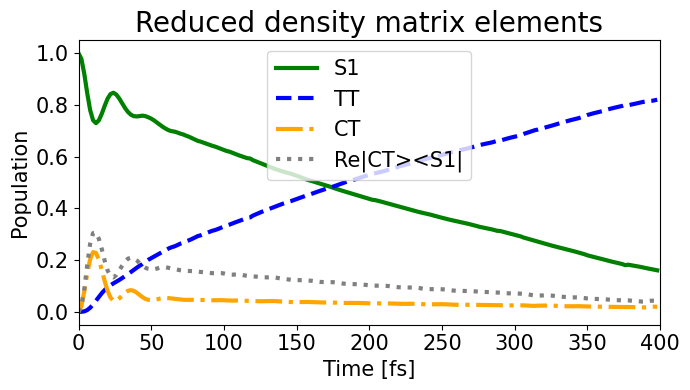

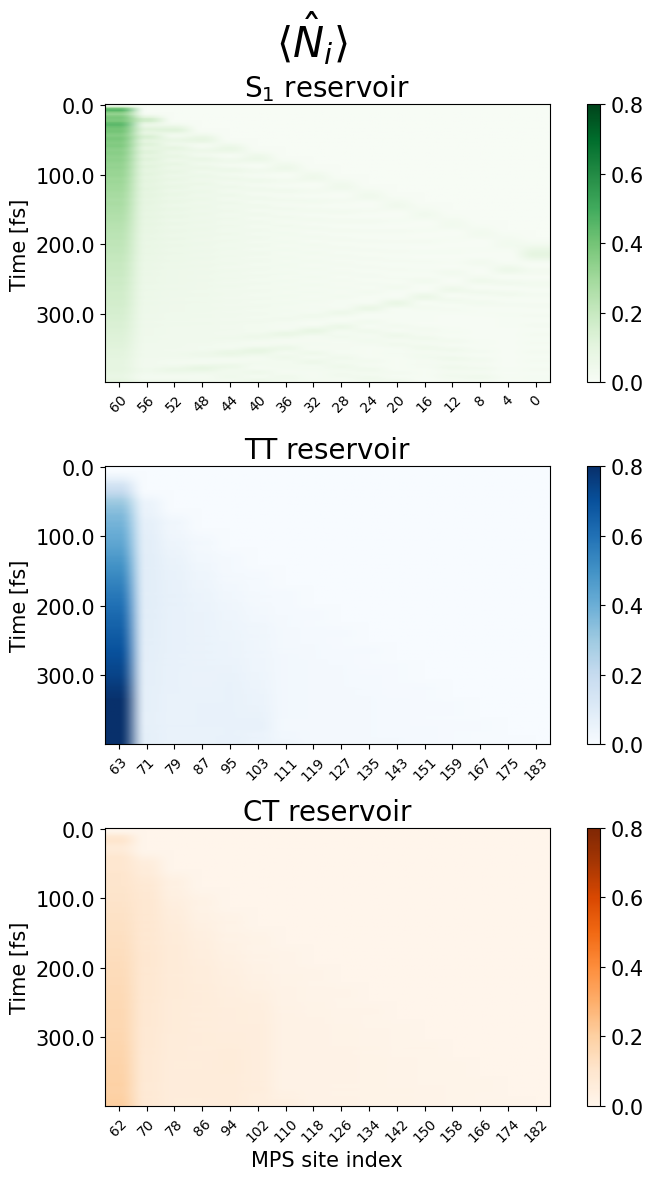

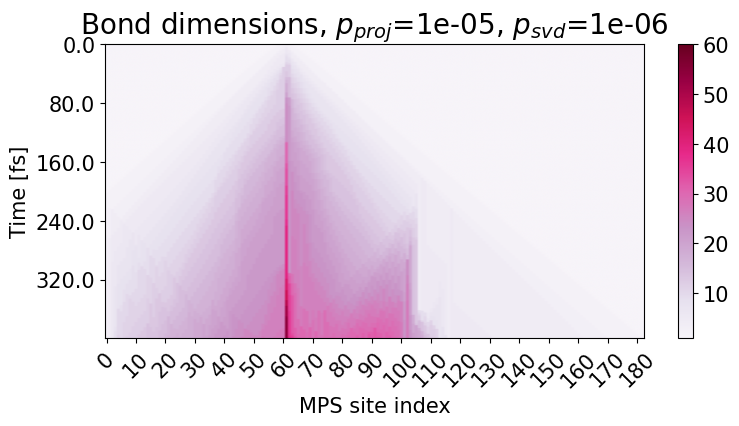

In [4]:
D=60
proj=5
svd=6
cores=4
pathdir = f"singlet_fission_{D}D-0{proj}proj-0{svd}svd-{cores}cores_prop"
with nc.Dataset(f"{pathdir}/reduced_density.nc","r") as file:
    density_data_real = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["real"]
    density_data_imag = file.variables[f"rho_({sys_site}, {sys_site})_0"][:]["imag"]
    time_data = file.variables["time"][:]

plt.figure(figsize=(7,4))
plt.title(f"Reduced density matrix elements")
plt.xlabel("Time [fs]")
plt.ylabel("Population")
plt.plot(time_data, density_data_real[:, 0, 0], label="S1", color='green', linestyle='-')
plt.plot(time_data, density_data_real[:, 1, 1], label="TT", color='blue', linestyle='--')
plt.plot(time_data, density_data_real[:, 2, 2], label="CT", color='orange',linestyle='-.')
plt.plot(time_data, density_data_real[:, 0, 2], label="Re|CT><S1|", color='gray', linestyle=':')
plt.xlim(0.0, 400)
plt.legend()
plt.tight_layout()
plt.savefig(f"reduced-density-{D}D-0{proj}proj-0{svd}svd-{cores}procs.pdf")
plt.show()

path = f"{pathdir}/expectations.dat"
with open(path, "r") as f:
    header = f.readline().strip()
    columns = re.split(r"\s+", header)
    columns = [columns[1]] + columns[3:]
    data = f.readlines()

df = pl.read_csv(
    path,
    separator="\t",
    new_columns=columns,
    has_header=False,
    skip_rows=1,
    schema_overrides={col: pl.Float64 for col in columns},
)


plt.figure(figsize=(8, 12))
columns_S1=columns[2:18]
plt.subplot(3, 1, 1)
plt.imshow(df[columns_S1], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Greens")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_S1)), [name[1:] for name in columns_S1], rotation=45,size=10)
plt.title(r"S$_1$ reservoir")
plt.suptitle(r"$\langle \hat{N}_i \rangle$")

plt.subplot(3, 1, 2)
columns_TT=columns[34:50]
plt.imshow(df[columns_TT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Blues")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_TT)), [name[1:] for name in columns_TT], rotation=45, size=10)
plt.title(r"TT reservoir")

plt.subplot(3, 1, 3)
columns_CT=columns[18:34]
plt.imshow(df[columns_CT], aspect=5.0e-02, vmax=0.8, vmin=0.0, cmap="Oranges")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::50], df["time"][::50])
plt.xticks(np.arange(len(columns_CT)), [name[1:] for name in columns_CT], rotation=45, size=10)
plt.title(r"CT reservoir")

plt.tight_layout()
plt.savefig(f"bath-expectation-{D}D-0{proj}proj-0{svd}svd-{cores}procs.pdf")
plt.show()

path = f"{pathdir}/bonddim.dat"
with open(path, "r") as f:
    header = f.readline().strip()
    columns = re.split(r"\s+", header)
    columns = [columns[1]] + columns[3:]
    data = f.readlines()

df = pl.read_csv(
    path,
    separator="\t",
    new_columns=columns,
    has_header=False,
    skip_rows=1,
    schema_overrides={columns[0]: pl.Float64} | {col: pl.UInt8 for col in columns[1:]}
)


plt.figure(figsize=(8, 4))
plt.imshow(df[columns[1:]], aspect=5.0e-02,vmax=D, vmin=1, cmap="PuRd")
plt.colorbar()
plt.ylabel("Time [fs]")
plt.xlabel("MPS site index")
plt.yticks(np.arange(len(df))[::400], df["time"][::400])
plt.xticks(np.arange(0, len(columns) - 1, 10), columns[1:-1:10], rotation=45)
plt.title(f"Bond dimensions, "+r"$p_{proj}$"+f"=1e-0{proj}, "+r"$p_{svd}$"+f"=1e-0{svd}")
plt.tight_layout()
plt.savefig(f"bond-dimensions-{D}D-0{proj}proj-0{svd}svd-{cores}procs.pdf")
plt.show()